In [20]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [21]:
file= r'C:\Users\Pratik\Desktop\FA\ML\ALL CSV FILES\wine.csv'

df=pd.read_csv(file)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 92, stratify = y)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("training set score: %f" % tree.score(X_train, y_train))
print("test set score: %f" % tree.score(X_test, y_test))

training set score: 1.000000
test set score: 0.600816


In [27]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
from sklearn.model_selection import GridSearchCV



In [29]:
df_bins = df.copy()
print(df_bins['quality'].unique())
df_bins['quality'] =  df_bins['quality'].replace([3,4,5], 0)
df_bins['quality'] =  df_bins['quality'].replace([6,7,8,9], 1)
print(df_bins['quality'].unique())

[6 5 7 8 4 3 9]
[1 0]


In [30]:
X = df_bins.drop('quality', axis = 1)
y = df_bins['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 92, stratify = y)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("training set score: %f" % tree.score(X_train, y_train))
print("test set score: %f" % tree.score(X_test, y_test))

training set score: 1.000000
test set score: 0.769796


In [31]:
depth = list(range(2,8))
split = list(range(2,5))
leaf = list(range(5,10))
criteria = ['gini','entropy']

param_grid = { 'max_depth' : depth,
             'min_samples_split' : split,
             'max_leaf_nodes' : leaf,
             'criterion' : criteria}



tree_grid_cv = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_grid_cv, param_grid, cv=10)

grid_search.fit(X_train, y_train)

KeyError: 'gini'

In [ ]:
print("Best Parameters = ", grid_search.best_params_)
print("Best score = ", grid_search.best_score_)
print("Test Accuracy score = ", grid_search.score(X_test, y_test))

In [17]:
tree.feature_importances_

array([0.06868137, 0.11154738, 0.07703844, 0.06301862, 0.07912297,
       0.10598094, 0.09058563, 0.05980859, 0.07477118, 0.06679367,
       0.20265121])

(0, 1)

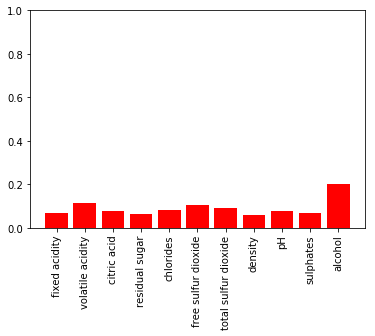

In [19]:
#plt.plot(tree.feature_importances_, 'o')
plt.bar(range(11), tree.feature_importances_, color="r", align="center")
plt.xticks(range(11), X.columns, rotation = 90)
plt.ylim(0, 1)